<a href="https://colab.research.google.com/github/YoshifumiMiyagi/PECARN-Group1-/blob/main/PECARN_Group_1_clustering_(KModes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
SEED = 42
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# CSVファイルを読み込む
df = pd.read_csv('/content/TBI PUD 10-08-2013.csv')
# 使用された説明変数とCTスキャンの必要性を示す目的変数をリストにする

variables_of_interest = [
    'AgeTwoPlus',         # 年齢
    'High_impact_InjSev', # 外傷の重症度
    'LOCSeparate',        # 意識喪失の履歴
    'LocLen',             # 意識喪失の持続時間
    'HA_verb',            # 頭痛の有無
    'HASeverity',         # 頭痛の重症度
    'Vomit',              # 嘔吐の履歴
    'VomitNbr',           # 嘔吐の回数
    'ActNorm',            # 保護者の観察
#    'GCSTotal',           # GCSスコア
    'AMS',                # 精神状態の変化
    'SFxBas',             # 基底頭蓋骨骨折の兆候
    'SFxPalp',            # 触知可能な頭蓋骨骨折
    'Hema',               # 頭皮血腫
    'HemaLoc',            # 頭皮血腫の位置
#    'HospHeadPosCT',      # 目的変数（CTスキャンと2日以上の入院の必要性）
#    'PosCT'               # 目的変数（CTスキャンの必要性）
]

variables_of_numeric = [
    'GCSTotal',           # GCSスコア
    'AgeInMonth',         # 月齢
    'AgeinYears',         # 年
]
# 説明変数を抽出
df_selected = df[variables_of_interest]

In [ ]:
#dat = df_selected[df_selected['PosCT'] != 92]
dat = df_selected
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df2 = pd.DataFrame(imputer.fit_transform(dat))
df2.columns = dat.columns
df2

,AgeTwoPlus,High_impact_InjSev,LOCSeparate,LocLen,HA_verb,HASeverity,Vomit,VomitNbr,ActNorm,AMS,SFxBas,SFxPalp,Hema,HemaLoc
0,2.0,2.0,0.0,92.0,1.0,1.0,0.0,92.0,1.0,0.0,0.0,0.0,1.0,3.0
1,2.0,2.0,0.0,92.0,0.0,92.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,92.0
2,2.0,2.0,0.0,92.0,0.0,92.0,0.0,92.0,0.0,1.0,1.0,1.0,1.0,3.0
3,1.0,1.0,0.0,92.0,91.0,92.0,0.0,92.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,2.0,0.0,92.0,91.0,92.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43394,2.0,2.0,0.0,92.0,0.0,92.0,0.0,92.0,1.0,0.0,0.0,0.0,0.0,92.0
43395,2.0,1.0,0.0,92.0,0.0,92.0,0.0,92.0,1.0,0.0,0.0,0.0,1.0,1.0
43396,2.0,1.0,0.0,92.0,0.0,92.0,0.0,92.0,1.0,0.0,0.0,0.0,1.0,1.0
43397,2.0,2.0,0.0,92.0,0.0,92.0,0.0,92.0,1.0,0.0,0.0,0.0,0.0,92.0


In [ ]:
# 数が3以上のカテゴリカル変数のリスト
categorical_variables = [
    'High_impact_InjSev',
    'LOCSeparate',
    'LocLen',
    'HA_verb',
    'HASeverity',
    'VomitNbr',
    'SFxPalp',
    'HemaLoc',
#    'PosCT'
]

# 数字に対応するアルファベットを辞書で定義
number_to_letter = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    91: 'F',
    92: 'G',
}

# for文でリストを回して、カテゴリ変数をアルファベットに変換
for var in categorical_variables:
    df2[var] = df2[var].map(number_to_letter)

In [ ]:
df2

,AgeTwoPlus,High_impact_InjSev,LOCSeparate,LocLen,HA_verb,HASeverity,Vomit,VomitNbr,ActNorm,AMS,SFxBas,SFxPalp,Hema,HemaLoc
0,2.0,C,A,G,B,B,0.0,G,1.0,0.0,0.0,A,1.0,D
1,2.0,C,A,G,A,G,1.0,D,1.0,0.0,0.0,A,0.0,G
2,2.0,C,A,G,A,G,0.0,G,0.0,1.0,1.0,B,1.0,D
3,1.0,B,A,G,F,G,0.0,G,1.0,0.0,0.0,A,1.0,B
4,1.0,C,A,G,F,G,1.0,B,0.0,1.0,0.0,A,1.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43394,2.0,C,A,G,A,G,0.0,G,1.0,0.0,0.0,A,0.0,G
43395,2.0,B,A,G,A,G,0.0,G,1.0,0.0,0.0,A,1.0,B
43396,2.0,B,A,G,A,G,0.0,G,1.0,0.0,0.0,A,1.0,B
43397,2.0,C,A,G,A,G,0.0,G,1.0,0.0,0.0,A,0.0,G


In [ ]:
df_selected_onehot = pd.get_dummies(df2, columns=categorical_variables)
df_selected_onehot.columns

Index(['AgeTwoPlus', 'Vomit', 'ActNorm', 'AMS', 'SFxBas', 'Hema',
       'High_impact_InjSev_B', 'High_impact_InjSev_C', 'High_impact_InjSev_D',
       'LOCSeparate_A', 'LOCSeparate_B', 'LOCSeparate_C', 'LocLen_B',
       'LocLen_C', 'LocLen_D', 'LocLen_E', 'LocLen_G', 'HA_verb_A',
       'HA_verb_B', 'HA_verb_F', 'HASeverity_B', 'HASeverity_C',
       'HASeverity_D', 'HASeverity_G', 'VomitNbr_B', 'VomitNbr_C',
       'VomitNbr_D', 'VomitNbr_G', 'SFxPalp_A', 'SFxPalp_B', 'SFxPalp_C',
       'HemaLoc_B', 'HemaLoc_C', 'HemaLoc_D', 'HemaLoc_G'],
      dtype='object')

# K-modes

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
# # エルボー法の実行
# cost = []
# for i in range(1, 10):
#     kmodes = KModes(n_clusters=i, n_init=2, verbose=0,random_state=SEED)
#     kmodes.fit(df_selected_onehot)
#     cost.append(kmodes.cost_)

# # エルボーのプロット
# plt.plot(range(1, 10), cost, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Cost')
# plt.show()

# Elbow 6ぽいけどひとまずk=3で解析

In [ ]:
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
k = 3

categorical_data = df_selected_onehot

kmodes = KModes(n_clusters=k, init='Huang', n_init=3, verbose=1,random_state=SEED)
#kmodes = KModes(n_clusters=k, init='Cao', n_init=5, verbose=1,random_state=SEED)
clusters = kmodes.fit_predict(categorical_data)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_data).toarray()

pca = PCA(n_components=k,random_state=SEED)
reduced_data = pca.fit_transform(encoded_data)

pca_explained_variance = pca.explained_variance_ratio_
print("PCA Explained Variance:", pca_explained_variance)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8284, cost: 163278.0
Run 1, iteration: 2/100, moves: 11295, cost: 152338.0
Run 1, iteration: 3/100, moves: 495, cost: 152338.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6525, cost: 166362.0
Run 2, iteration: 2/100, moves: 8789, cost: 151908.0
Run 2, iteration: 3/100, moves: 104, cost: 151908.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 17786, cost: 159452.0
Run 3, iteration: 2/100, moves: 5543, cost: 151908.0
Run 3, iteration: 3/100, moves: 183, cost: 151908.0
Best run was number 2
PCA Explained Variance: [0.1753174  0.15970852 0.11653526]


 # PCA

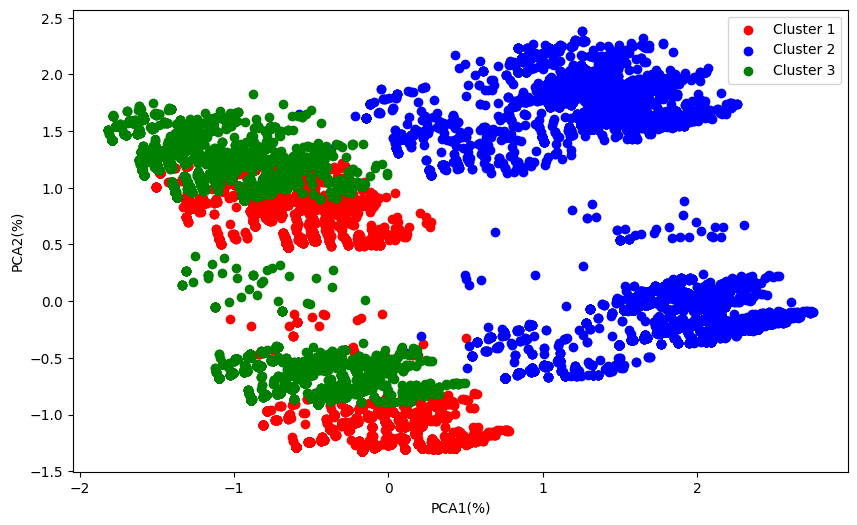

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['r', 'b','g','pink','orange','yellow']
for cluster in range(k):
    points = reduced_data[clusters == cluster]
    plt.scatter(points[:, 0], points[:, 1], c=colors[cluster], label=f'Cluster {cluster+1}')

plt.xlabel('PCA1(%)')
plt.ylabel('PCA2(%)')
plt.legend()
#plt.savefig('Figure1.png',format="png", dpi=600)
plt.show()

# tSNE

In [ ]:
from sklearn.manifold import TSNE

# t-SNEを使用して次元削減
tsne = TSNE(n_components=2, perplexity=15, learning_rate=100, n_iter=1000, metric='euclidean', random_state=42)
reduced_data = tsne.fit_transform(encoded_data)

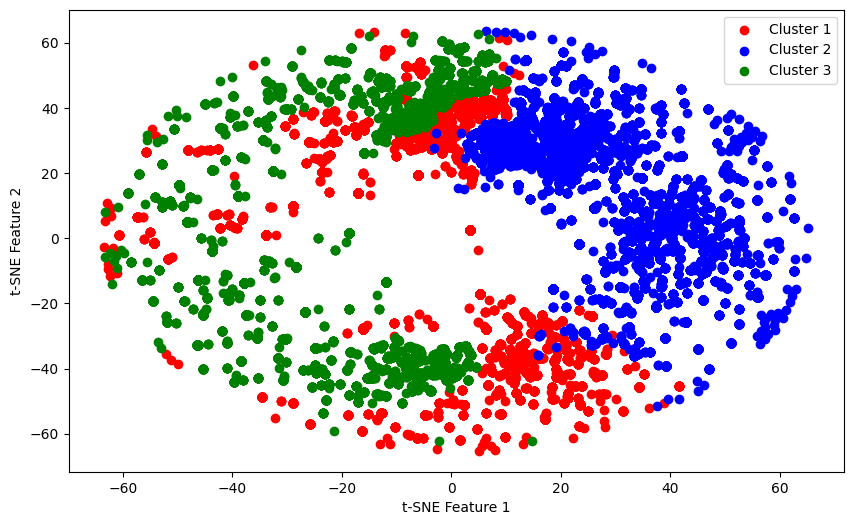

In [ ]:
# 2Dプロット
plt.figure(figsize=(10, 6))

# 各クラスタを異なる色でプロット
colors = ['r', 'b','g','pink','orange','yellow']
for cluster in range(k):
    points = reduced_data[clusters == cluster]
    plt.scatter(points[:, 0], points[:, 1], c=colors[cluster], label=f'Cluster {cluster+1}')

plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

# UMAP

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


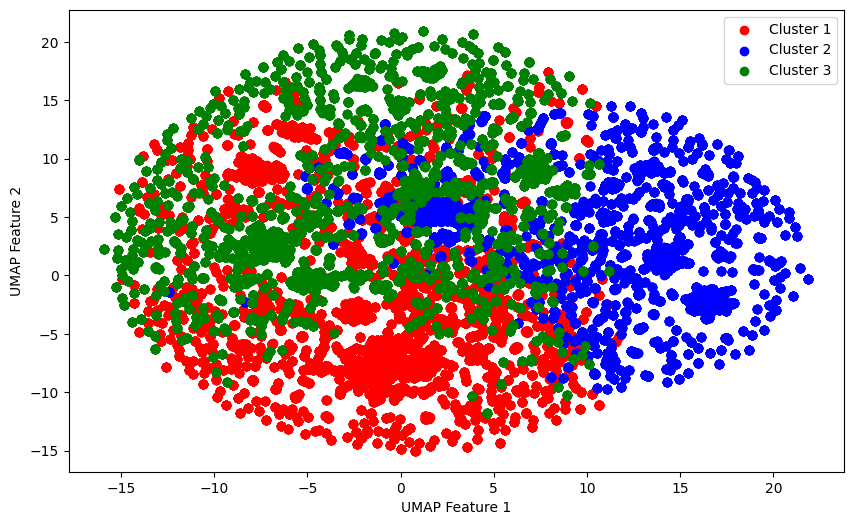

In [ ]:
import umap

# UMAPを使用して次元削減
reducer = umap.UMAP(n_neighbors=4, n_components=2, metric='euclidean', min_dist=0.001, random_state=42)
#reducer = umap.UMAP(n_components=2,random_state=42)
reduced_data = reducer.fit_transform(encoded_data)

# 2Dプロット
plt.figure(figsize=(10, 6))

# 各クラスタを異なる色でプロット
colors = ['r', 'b','g','pink','orange','yellow']
for cluster in range(k):
    points = reduced_data[clusters == cluster]
    plt.scatter(points[:, 0], points[:, 1], c=colors[cluster], label=f'Cluster {cluster+1}')

plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.legend()
plt.show()

# Feature creation

In [ ]:
df3 = df2.copy()
df3['cluster'] = clusters
df3['GCSTotal'] = df['GCSTotal']
df3['AgeInMonth'] = df['AgeInMonth']
df3['AgeinYears'] = df['AgeinYears']

In [ ]:
df2.shape, df3.shape

((43399, 14), (43399, 18))

# Quantification analysis

In [ ]:
k=3 #6
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

Cluster 0: n = 16533
Cluster 1: n = 12806
Cluster 2: n = 14060


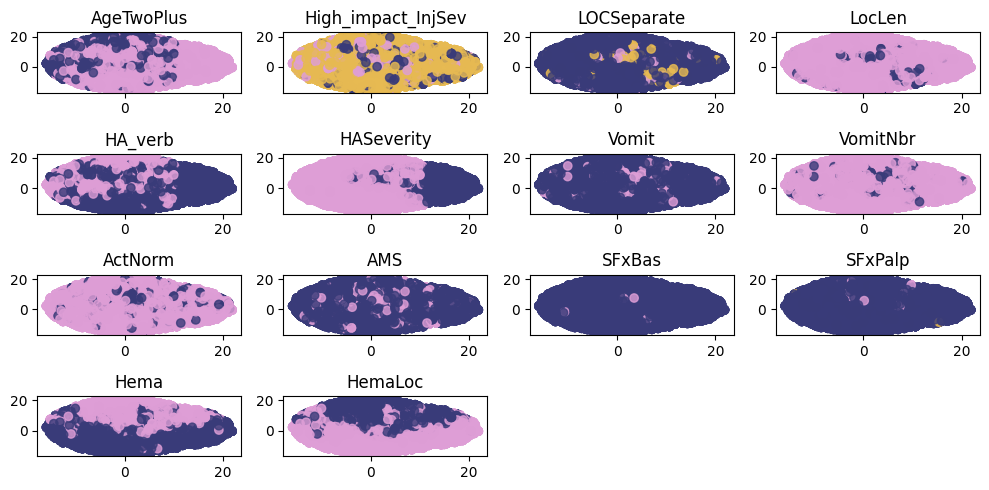

In [ ]:
embedding = reduced_data

fig = plt.figure(figsize=(10,5))
cols = df2.columns
for i, col in enumerate(cols):
    ax = fig.add_subplot(4, 4, i+1, title=col)
    ax.scatter(embedding[:, 0], embedding[:, 1],
        c=dat[col], cmap='tab20b', alpha=0.8)
fig.tight_layout()
plt.show()

<ipython-input-94-60e11987485e>:46: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log2(fcs), -np.log10(q_values),
<ipython-input-94-60e11987485e>:62: RuntimeWarning: divide by zero encountered in log10
  ax.annotate(label, (np.log2(fcs)[j], -np.log10(q_values)[j]), size=9)


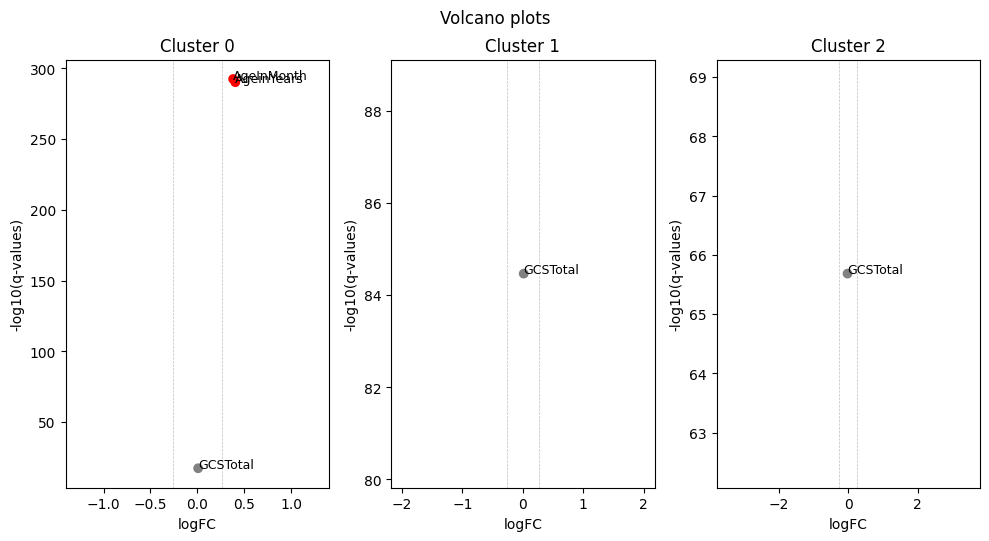

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

df_features_with_clusters = df.copy()
df_features_with_clusters['cluster'] = clusters
cols = variables_of_numeric

q_threshold = 0.05
fc_threshold = 1.2

fig = plt.figure(figsize=(10,10))

for i in range(k):
    p_values = []
    fcs = []

    for col in cols:

        group_1 = df_features_with_clusters[df_features_with_clusters['cluster'] == i][col]
        group_2 = df_features_with_clusters[df_features_with_clusters['cluster'] != i][col]
        p_value = stats.ttest_ind(group_1, group_2, equal_var=False)[1]
        p_values.append(p_value)


        fc = group_1.mean()/group_2.mean()
        fcs.append(fc)


    q_values = multipletests(p_values, method='fdr_bh')[1]


    colors = []
    for col, q_value, fc in zip(cols, q_values, fcs):

        if q_value < q_threshold and fc > fc_threshold:
            colors.append('red')

        elif q_value < q_threshold and fc < 1/fc_threshold:
            colors.append('blue')

        else:
            colors.append('gray')

    ax = fig.add_subplot(2,3,i+1)
    ax.scatter(np.log2(fcs), -np.log10(q_values),
    c=colors)


    max_val = max(abs(np.nanmin(np.log2(fcs)[np.log2(fcs) != -np.inf])), max(np.log2(fcs)))
    ax.set_xlim([-max_val-1, max_val+1])
    ax.set_ylim(ax.get_ylim())

    ax.hlines([-np.log10(q_threshold)], -max_val-1, max_val+1, 'gray', 'dashed', linewidth=0.5, alpha=0.5)
    ax.vlines([np.log2(fc_threshold), np.log2(1/fc_threshold)], ax.get_ylim()[0], ax.get_ylim()[1], 'gray', 'dashed', linewidth=0.5, alpha=0.5)


    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('logFC')
    ax.set_ylabel('-log10(q-values)')
    for j, label in enumerate(cols):
        ax.annotate(label, (np.log2(fcs)[j], -np.log10(q_values)[j]), size=9)

fig.suptitle('Volcano plots')
fig.tight_layout()
plt.show()

# Statistics

'GCStotal'

In [ ]:
import scipy.stats as stats

data = df3.copy()
# グループごとにデータを分割
grouped_data = [data['GCSTotal'][data['cluster'] == group] for group in data['cluster'].unique()]

# ANOVAの実行
f_val, p_val = stats.f_oneway(*grouped_data)

print(f'F-value: {f_val}')
print(f'P-value: {p_val}')

F-value: 248.1241986197244
P-value: 7.12038089465661e-108


In [ ]:
print(data['GCSTotal'][data['cluster'] == 0].mean())
print(data['GCSTotal'][data['cluster'] == 1].mean())
print(data['GCSTotal'][data['cluster'] == 2].mean())
# print(data['GCSTotal'][data['cluster'] == 3].mean())
# print(data['GCSTotal'][data['cluster'] == 4].mean())
# print(data['GCSTotal'][data['cluster'] == 5].mean())

14.892397024133551
14.944791503982508
14.685135135135136


'AgeInMonth'

In [ ]:
grouped_data = [data['AgeInMonth'][data['cluster'] == group] for group in data['cluster'].unique()]

# ANOVAの実行
f_val, p_val = stats.f_oneway(*grouped_data)

print(f'F-value: {f_val}')
print(f'P-value: {p_val}')

F-value: 20758.091493573625
P-value: 0.0


In [ ]:
print(data['AgeInMonth'][data['cluster'] == 0].mean())
print(data['AgeInMonth'][data['cluster'] == 1].mean())
print(data['AgeInMonth'][data['cluster'] == 2].mean())
# print(data['AgeInMonth'][data['cluster'] == 3].mean())
# print(data['AgeInMonth'][data['cluster'] == 4].mean())
# print(data['AgeInMonth'][data['cluster'] == 5].mean())

98.60448799370955
135.83781040137436
20.9375533428165


'AgeinYears'

In [ ]:
grouped_data = [data['AgeinYears'][data['cluster'] == group] for group in data['cluster'].unique()]

# ANOVAの実行
f_val, p_val = stats.f_oneway(*grouped_data)

print(f'F-value: {f_val}')
print(f'P-value: {p_val}')

F-value: 20704.314714037617
P-value: 0.0


In [ ]:
print(data['AgeinYears'][data['cluster'] == 0].mean())
print(data['AgeinYears'][data['cluster'] == 1].mean())
print(data['AgeinYears'][data['cluster'] == 2].mean())
# print(data['AgeinYears'][data['cluster'] == 3].mean())
# print(data['AgeinYears'][data['cluster'] == 4].mean())
# print(data['AgeinYears'][data['cluster'] == 5].mean())

7.756003145224702
10.85998750585663
1.303271692745377
